<a href="https://colab.research.google.com/github/sakshamverma-git/classifying-flowers/blob/main/classifying_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

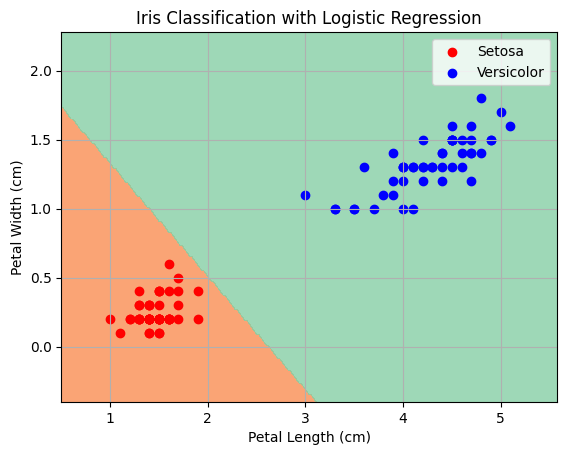

Classification Accuracy: 100.00%
Learned weights: [0.54650652 0.66653904], Bias: -1.43


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load and preprocess Iris dataset
iris = load_iris()
X = iris.data[:100, [2, 3]]  # Use petal length and width, first 100 samples (Setosa vs Versicolor)
y = iris.target[:100]  # Binary classification (0: Setosa, 1: Versicolor)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression implementation
def logistic_regression(X, y, learning_rate=0.01, num_iterations=1000):
    m, n = X.shape
    weights = np.zeros((n, 1))
    bias = 0

    # Gradient descent
    for _ in range(num_iterations):
        # Forward pass
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)

        # Compute gradients
        dw = (1/m) * np.dot(X.T, (y_pred - y.reshape(-1, 1)))
        db = (1/m) * np.sum(y_pred - y.reshape(-1, 1))

        # Update parameters
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

# Prediction function
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    return sigmoid(z) >= 0.5

# Train the model
weights, bias = logistic_regression(X, y)

# Create mesh grid for decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = predict(grid, weights, bias).reshape(xx.shape)

# Visualize results
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Setosa')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Versicolor')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Classification with Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

# Calculate accuracy
predictions = predict(X, weights, bias)
accuracy = np.mean(predictions.flatten() == y)
print(f'Classification Accuracy: {accuracy * 100:.2f}%')
print(f'Learned weights: {weights.flatten()}, Bias: {bias:.2f}')